# Assignment 3

_Author: Varun Sundar, EE16B068._

## Abstract

We examine fitting of functions with their computed fourier seriers' coefficients. This is done for two cases - a continuous periodic function , $\cos{(\cos{({x})})} $ and a finitely discontinuos periodic function $\exp(x)$. The exponent is discontinuous at the start and end of each period. This, as we go on to examine, affects the uniform convergence of the fourier series. 


## Introduction

Fourier series of a periodic function with period $2\pi$ may be computed as follows:

$$ a_0 + \sum_{n=1}^{\infty} {a_n*\cos(nx) + b_n*\sin(nx)} $$

where,

$$a_0 = \frac{1}{2\pi} \int_0^{2\pi}f(x)dx$$
$$a_n = \frac{1}{2\pi} \int_0^{2\pi}f(x)*\cos(nx)dx$$
$$b_n = \frac{1}{2\pi} \int_0^{2\pi}f(x)*\sin(nx)dx$$

In case of functions which are not inherently periodic in $(0,2\pi)$, we may choose to extend their defenitions in a piece-wise manner to satisfy the reqiuirement of periodicity.

**Conventions followed:**
1. We are using Python 3, GCC for C
2. Underscore naming vs Camel Case
3. PEP 25 convention style.
4. Importing numpy and scipy seperately for brevity of functions.


## Question 1

We define vectorised implementations for $\exp(x)$ and $\cos{(\cos{x})}$ over the interval $[0,2\pi)$. The implementations are however, valid over real numbers.

We utilise a decorator to force $\exp(x)$ to be periodic, with the same period, by wrapping over values from $[0,2\pi)$. The two functions are then plotted.


In [16]:
import numpy as np

def make_periodic(oldfunc):
    def newfunc(x):
        return oldfunc(np.remainder(x,2*np.pi))
    return newfunc

@make_periodic
def exp(x):
    return np.exp(x)

exp=make_periodic(exp)
def cos_cos(x):
    return np.cos(np.cos(x))

The two functions are plotted on semi-logy plots (for $\exp(x)$) and linear plots respectively.

Populating the interactive namespace from numpy and matplotlib


/Users/Ankivarun/anaconda3/envs/tf_python3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['figure', 'exp', 'lstsq']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
/Users/Ankivarun/anaconda3/envs/tf_python3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  app.launch_new_instance()


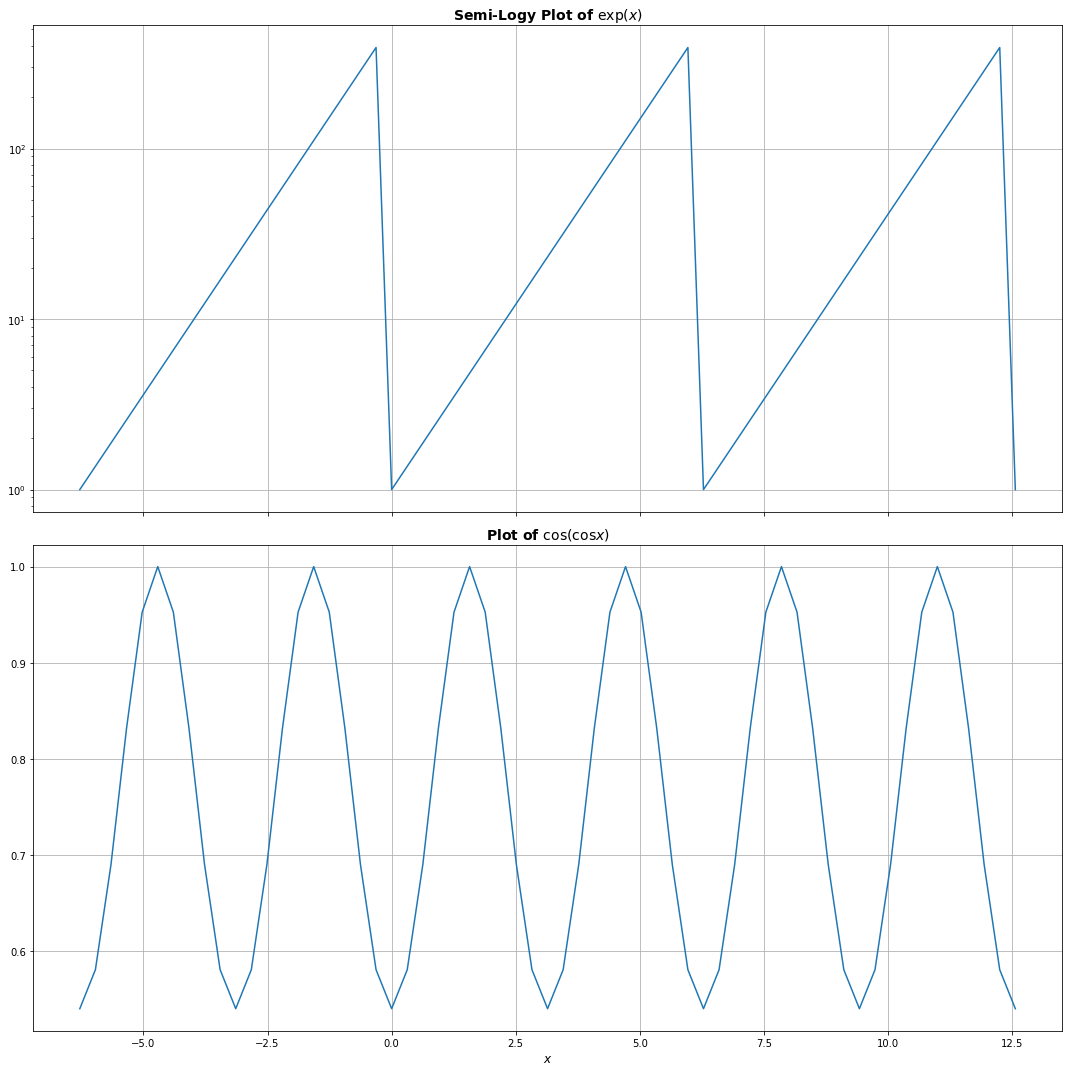

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline  

%pylab inline
pylab.rcParams['figure.figsize'] = (15, 15)

figure, axarr = plt.subplots(2, sharex=True)
plt.grid(True,which="both")

axarr[0].grid(True)
axarr[0].set_title(r'Semi-Logy Plot of $\exp(x)$', fontsize=14,fontweight="bold")
axarr[1].set_title(r'Plot of $\cos{(\cos{x})}$', fontsize=14,fontweight="bold")

plt.xlabel('$x$',fontsize=12)

x=np.linspace(-2,4,6/0.1+1)
x=x*np.pi
axarr[0].semilogy(x,make_periodic(exp)(x))
axarr[1].plot(x,cos_cos(x))

# Neaten up plots
figure.tight_layout()
plt.show()

## Question 2

We now compute the first 51 coefficients via the Fourier Series integral. Taken as 25 of $a$, 25 of $b$, and one of $a_0$.

We observe that the sinusoidal components ($b_n$) for $\cos{(\cos{(x)})}$ is nearly zero. This makes intutive sense.

In [18]:
from scipy import integrate as integrate

def cos_u(x,k,f):
    # Compute cosine Fourier Components
    return f(x)*np.cos(k*x)
def sin_u(x,k,f):
    # Compute sine Fourier Components
    return f(x)*np.sin(k*x)

# For exp (x)
exp_a0=np.array(integrate.quad(cos_u,0,2*np.pi,args=(0,exp))[0])/(2*np.pi)
exp_a=np.array([integrate.quad(cos_u,0,2*np.pi,args=(k,exp))[0] for k in range(1,26)])/(2*np.pi)
exp_b=np.array([integrate.quad(sin_u,0,2*np.pi,args=(k,exp))[0] for k in range(1,26)])/(2*np.pi)

# For cos(cos (x))
cos_cos_a0 = np.array(integrate.quad(cos_u,0,2*np.pi,args=(0,cos_cos))[0])/(2*np.pi)
cos_cos_a = np.array([integrate.quad(cos_u,0,2*np.pi,args=(k,cos_cos))[0] for k in range(1,26)])/(2*np.pi)
cos_cos_b = np.array([integrate.quad(sin_u,0,2*np.pi,args=(k,cos_cos))[0] for k in range(1,26)])/(2*np.pi)

# b_n for cos_cos_b is nearly zero
print(cos_cos_b)

[  2.03564840e-17  -3.81771654e-18   4.39077068e-18  -1.25287777e-16
  -2.11216429e-16   2.59100523e-16  -3.38779294e-16   1.56616592e-16
  -3.32333076e-16  -3.58081826e-17   5.24915864e-16  -1.30591326e-16
  -1.03257532e-16  -5.37731717e-16   2.90315278e-16  -2.34935261e-16
   4.53371847e-16  -2.29815928e-16  -4.17093578e-16   6.24978298e-16
  -4.33246633e-16  -3.93069146e-16  -4.30672335e-16  -5.82976222e-16
   1.28697622e-15]


## Question 3

We now plot the values of the two coeffecients.

These are taken in the order $(a_0,a_1,a_2,...,a_{25},b_1,b_2,...,b_{25})$

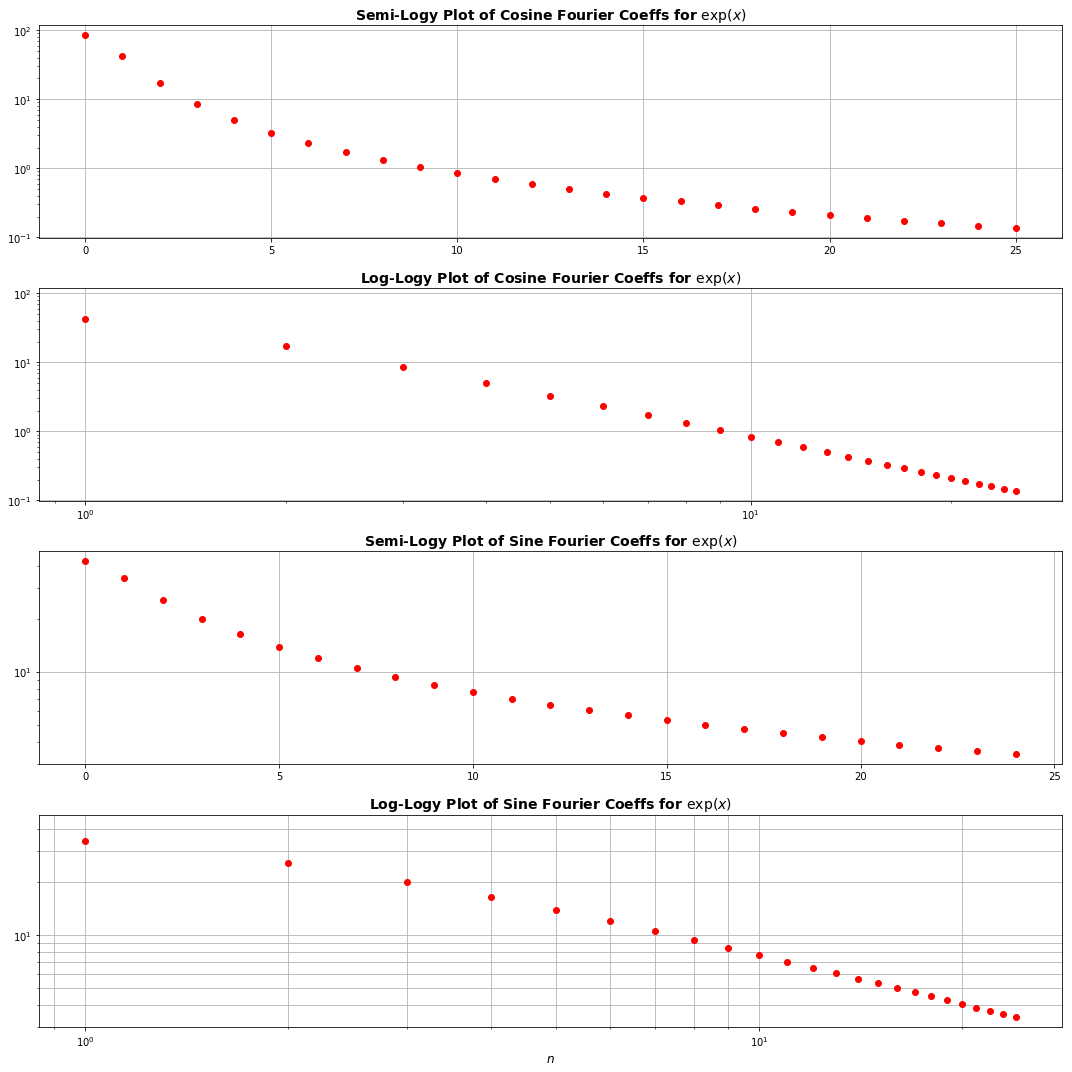

In [19]:
figure, axarr = plt.subplots(4)
pylab.rcParams['figure.figsize'] = (15, 15)
plt.grid(True,which="both")
axarr[0].set_title(r'Semi-Logy Plot of Cosine Fourier Coeffs for $\exp(x)$', fontsize=14,fontweight="bold")
axarr[1].set_title(r'Log-Logy Plot of Cosine Fourier Coeffs for $\exp(x)$', fontsize=14,fontweight="bold")
axarr[2].set_title(r'Semi-Logy Plot of Sine Fourier Coeffs for $\exp(x)$', fontsize=14,fontweight="bold")
axarr[3].set_title(r'Log-Logy Plot of Sine Fourier Coeffs for $\exp(x)$', fontsize=14,fontweight="bold")

axarr[0].grid(True)
axarr[1].grid(True)
axarr[2].grid(True)
axarr[3].grid(True)
plt.xlabel('$n$',fontsize=12)

n=list(range(51))

exp_list=[exp_a0]
exp_list[1:26]=exp_a
exp_list[26:52]=exp_b

axarr[0].semilogy(list(range(26)),np.array(exp_list[:26]),'ro')
axarr[1].loglog(list(range(26)),np.array(exp_list[:26]),'ro')
axarr[2].semilogy(list(range(25)),np.array(np.abs(exp_list[26:])),'ro')
axarr[3].loglog(list(range(25)),np.array(np.abs(exp_list[26:])),'ro')
figure.tight_layout()
plt.show()

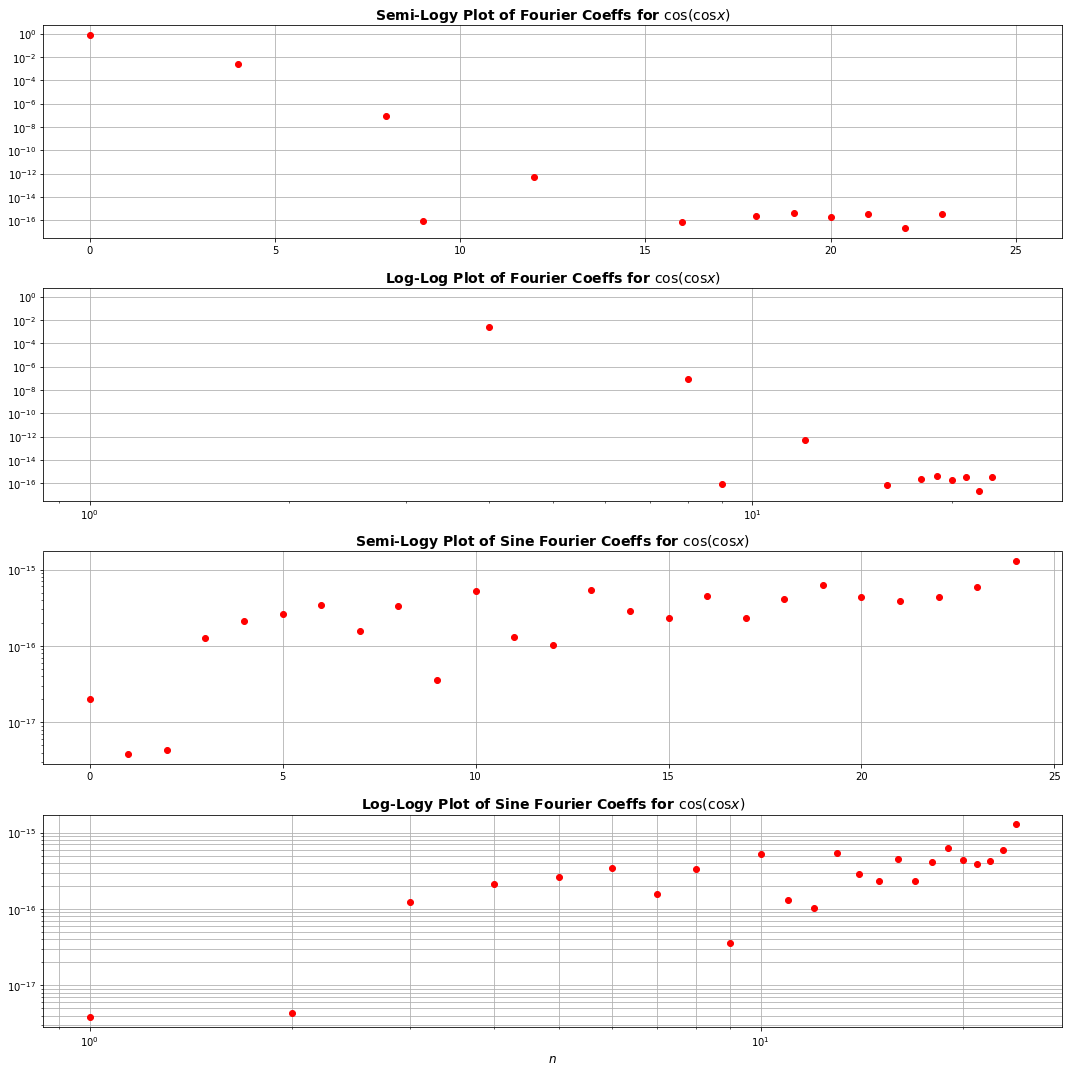

In [20]:
figure, axarr = plt.subplots(4)
plt.grid(True,which="both")
axarr[0].set_title(r'Semi-Logy Plot of Fourier Coeffs for $\cos{(\cos{x})}$', fontsize=14,fontweight="bold")
axarr[1].set_title(r'Log-Log Plot of Fourier Coeffs for $\cos{(\cos{x})}$', fontsize=14,fontweight="bold")
axarr[2].set_title(r'Semi-Logy Plot of Sine Fourier Coeffs for $\cos{(\cos{x})}$', fontsize=14,fontweight="bold")
axarr[3].set_title(r'Log-Logy Plot of Sine Fourier Coeffs for $\cos{(\cos{x})}$', fontsize=14,fontweight="bold")

axarr[0].grid(True)
axarr[1].grid(True)
axarr[2].grid(True)
axarr[3].grid(True)

plt.xlabel('$n$',fontsize=12)

n=list(range(51))

cos_cos_list=[cos_cos_a0]
cos_cos_list[1:26]=cos_cos_a
cos_cos_list[26:52]=cos_cos_b

axarr[0].semilogy(list(range(26)),np.array(cos_cos_list[:26]),'ro')
axarr[1].loglog(list(range(26)),np.array(cos_cos_list[:26]),'ro')
axarr[2].semilogy(list(range(25)),np.array(np.abs(cos_cos_list[26:])),'ro')
axarr[3].loglog(list(range(25)),np.array(np.abs(cos_cos_list[26:])),'ro')
figure.tight_layout()
plt.show()

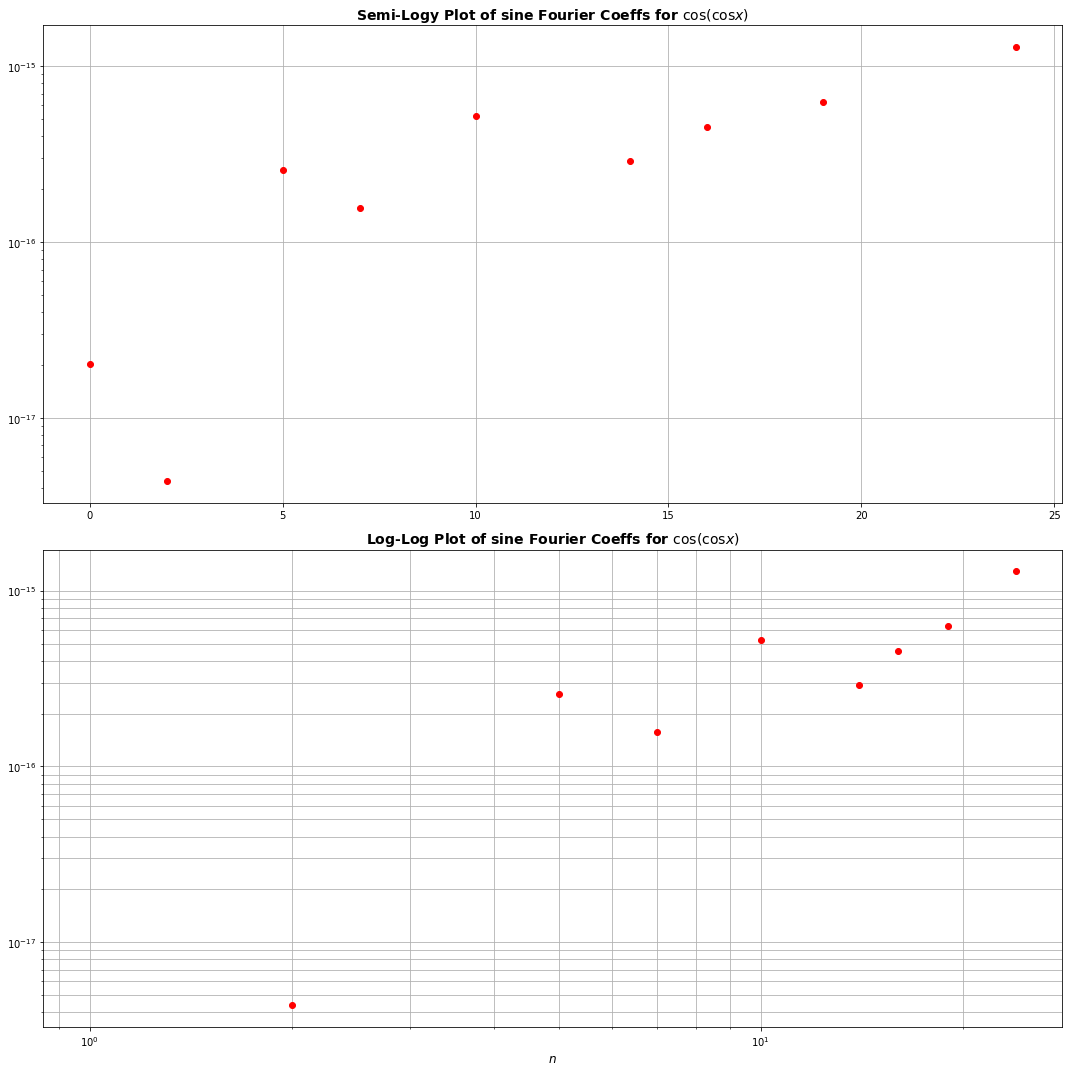

In [21]:
figure, axarr = plt.subplots(2)
plt.grid(True,which="both")
axarr[0].set_title(r'Semi-Logy Plot of sine Fourier Coeffs for $\cos{(\cos{x})}$', fontsize=14,fontweight="bold")
axarr[1].set_title(r'Log-Log Plot of sine Fourier Coeffs for $\cos{(\cos{x})}$', fontsize=14,fontweight="bold")
axarr[0].grid(True)

plt.xlabel('$n$',fontsize=12)

n=list(range(25))

cos_cos_list=[cos_cos_a0]
cos_cos_list[1:26]=cos_cos_a
cos_cos_list[26:52]=cos_cos_b

axarr[0].semilogy(n,np.array(cos_cos_list)[26:],'ro')
axarr[1].loglog(n,cos_cos_list[26:],'ro')
figure.tight_layout()
plt.show()

We notice that in the second case, ie..., that of $\cos(\cos(x))$, the sine components are nearly zero, indicating low sinusoidal dependence. This in propeties such as $\cos(\cos(x))$ being an odd function. 

Also in the second case, the fourier coefficients decay much more rapidly than in the case of $\exp{(x)}$. This can be attributed to the fact that owing to discontinuity,$\exp{(x)}$ requires high frequency components towards the end of its period. 

Also, we note that the fourier cosine components of $\cos(\cos(x))$ exhibit a linear variation under a semi-log plot, which can be attributed to a $\frac{1}{n}$ dependence for small n, and a $\frac{1}{n^{2}}$ for large n.

## Question 4

We perform a least squares estimation of the parameters. Consider a linearly spaced out vector $\vec{x}$ , which are used to sample $f(x)$ at each $x_i$.

$$ a_0+\sum_n{a_n\cos(nx_i)+b_n\sin(nx_i)} ≈ f(x_i) $$

We turn this into a linear regression problem:
$$
\quad
\begin{pmatrix} 
1 & \cos(x_1) & \sin(x_1) & .... & \cos(25x_1) & \sin(25x_1)\\
1 & \cos(x_2) & \sin(x_2) & .... & \cos(25x_2) & \sin(25x_2)\\
... & ... & ... & .... & ... & ... \\
1 & \cos(x_{400}) & \sin(x_{400}) & .... & \cos(25x_{400}) & \sin(25x_{400})
\end{pmatrix}
\quad
\begin{pmatrix} 
a_0\\
a_1\\
b_1\\
...\\
a_{25}\\
b_{25}
\end{pmatrix}
=
\quad
\begin{pmatrix} 
f(x_1)\\
f(x_2)\\
...\\
f(x_{400})
\end{pmatrix}
$$


We create the matrix on the left side and call it $A$ . We want to solve $Ac=b$
where $c$ are the fourier coefficients.

$L-2$ norm is used to solve for the "best" fit solutions. This is similar to using the Moore-Penrose Pseudo Inverse to compute the optimal solution.

We obtain, 

$$ c=(A^{T}A)^{-1}A*b $$


In [22]:
def create_matrices(f,x,n,c):
    # f is a vectorised implementation
    # Return (A,b)
    # n is the number of values
    # c is the number of coefficients
    b=f(x)
    A=np.zeros((n,c))
    A[:,0]=1
    
    for i in range(1,26):
        A[:,i]=np.cos(i*x)
        
    for i in range(1,26):
        A[:,i+25]=np.sin(i*x)
        
    return (A,b)

x=np.linspace(0,2*np.pi,num=400)

A_cos_cos,b_cos_cos=(create_matrices(cos_cos,x,len(x),51))
A_exp,b_exp=(create_matrices(exp,x,len(x),51))

## Question 5

Here, we plot the fourier coefficients found for both functions via the least squares approach. As in the previous case, we have plotted both cosine and sine components for both functions sepereately on log-log and semi-logy plots.

In [23]:
from scipy.linalg import lstsq

c_exp=lstsq(A_exp,b_exp)[0]
c_cos_cos=lstsq(A_cos_cos,b_cos_cos)[0]


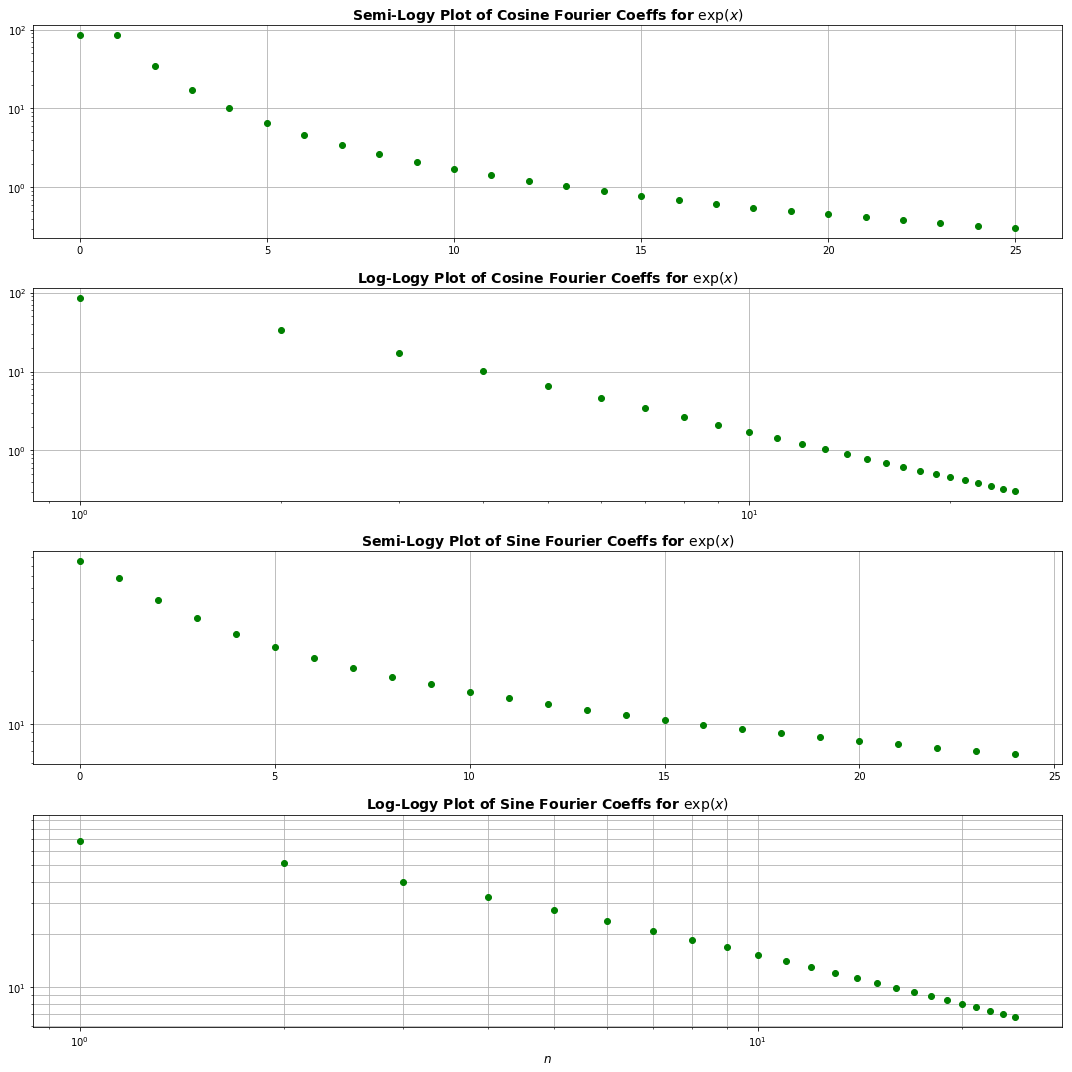

In [24]:
figure, axarr = plt.subplots(4)
plt.grid(True,which="both")
axarr[0].set_title(r'Semi-Logy Plot of Cosine Fourier Coeffs for $\exp(x)$', fontsize=14,fontweight="bold")
axarr[1].set_title(r'Log-Logy Plot of Cosine Fourier Coeffs for $\exp(x)$', fontsize=14,fontweight="bold")
axarr[2].set_title(r'Semi-Logy Plot of Sine Fourier Coeffs for $\exp(x)$', fontsize=14,fontweight="bold")
axarr[3].set_title(r'Log-Logy Plot of Sine Fourier Coeffs for $\exp(x)$', fontsize=14,fontweight="bold")

axarr[0].grid(True)
axarr[1].grid(True)
axarr[2].grid(True)
axarr[3].grid(True)

plt.xlabel('$n$',fontsize=12)

n=list(range(51))

axarr[0].semilogy(list(range(26)),np.array(c_exp[:26]),'go')
axarr[1].loglog(list(range(26)),np.array(c_exp[:26]),'go')
axarr[2].semilogy(list(range(25)),np.array(np.abs(c_exp[26:])),'go')
axarr[3].loglog(list(range(25)),np.array(np.abs(c_exp[26:])),'go')
figure.tight_layout()
plt.show()

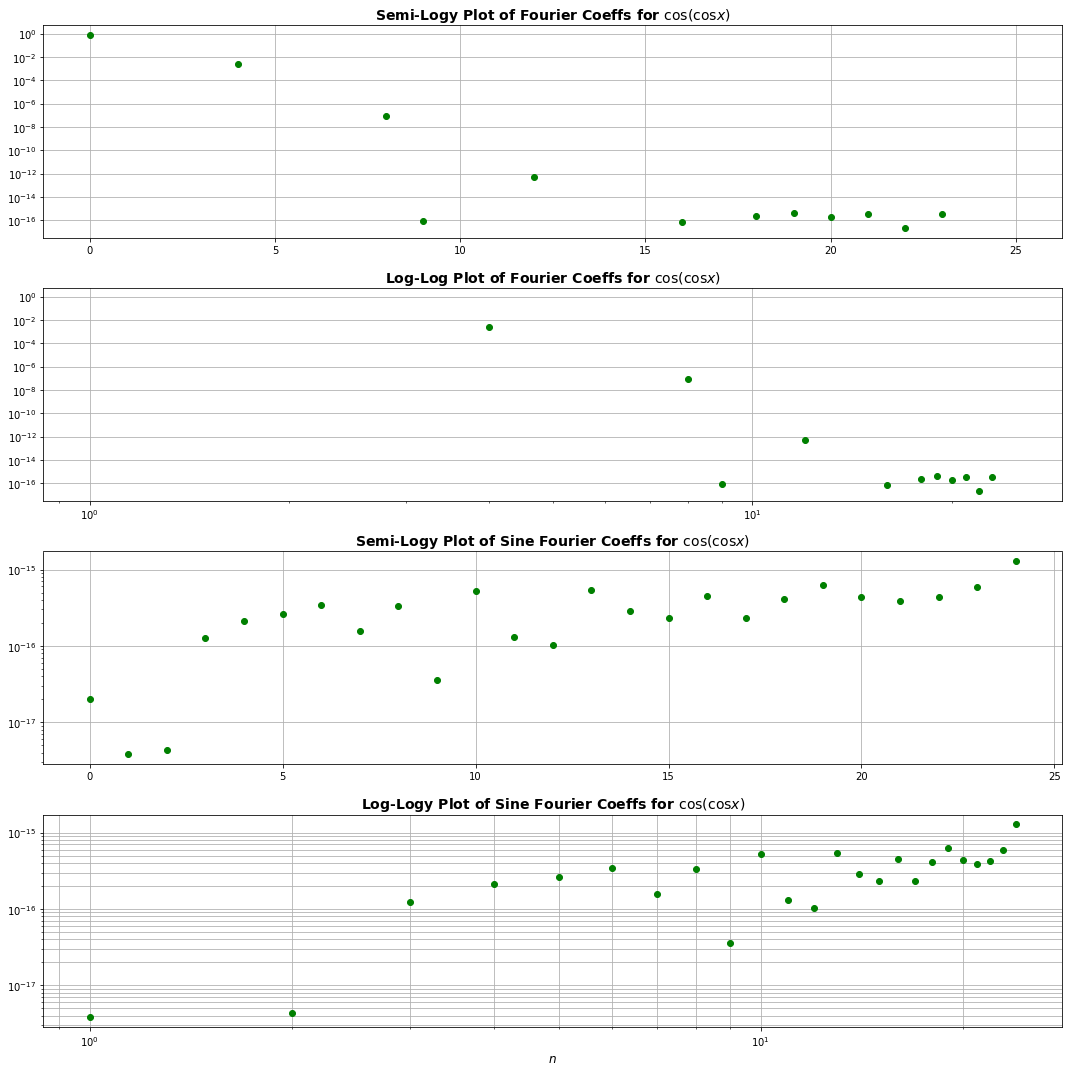

In [25]:
figure, axarr = plt.subplots(4)
plt.grid(True,which="both")
axarr[0].set_title(r'Semi-Logy Plot of Fourier Coeffs for $\cos{(\cos{x})}$', fontsize=14,fontweight="bold")
axarr[1].set_title(r'Log-Log Plot of Fourier Coeffs for $\cos{(\cos{x})}$', fontsize=14,fontweight="bold")
axarr[2].set_title(r'Semi-Logy Plot of Sine Fourier Coeffs for $\cos{(\cos{x})}$', fontsize=14,fontweight="bold")
axarr[3].set_title(r'Log-Logy Plot of Sine Fourier Coeffs for $\cos{(\cos{x})}$', fontsize=14,fontweight="bold")

axarr[0].grid(True)
axarr[1].grid(True)
axarr[2].grid(True)
axarr[3].grid(True)

plt.xlabel('$n$',fontsize=12)

n=list(range(51))

axarr[0].semilogy(list(range(26)),np.array(cos_cos_list[:26]),'go')
axarr[1].loglog(list(range(26)),np.array(cos_cos_list[:26]),'go')
axarr[2].semilogy(list(range(25)),np.array(np.abs(cos_cos_list[26:])),'go')
axarr[3].loglog(list(range(25)),np.array(np.abs(cos_cos_list[26:])),'go')
figure.tight_layout()
plt.show()

## Question 6

We now compute the arg-max error (absolute error per argument) obtained by the two methods; a least square estimation as well as the direct evaluation of Fourier coefficients.

We note that there is very little discrepancy in case of $\cos{\cos{(x)}}$ , where as there is substantial discrepancy in case of $\exp{(x)}$.

This can be alleviated for the function $\exp(x)$ by sampling more points for interpolation.

In [26]:
def error (u,v):
    return np.amax(np.abs(u-v))

error(1,2)

1

In [27]:
print ("Argmax Error on fourier coefficients for $\cos{\cos{(x)}}$ \t",error(c_cos_cos,cos_cos_list))

Argmax Error on fourier coefficients for $\cos{\cos{(x)}}$ 	 0.114903484932


In [28]:
print(c_exp)
print(exp_list)
print ("Argmax Error on fourier coefficients for $\exp{(x)}$ \t",error(c_exp,exp_list))

[ 85.08336415  85.09973932  34.05954604  17.04614846  10.04063202
   6.57636589   4.63096745   3.43543196   2.65019887   2.1075584
   1.71724946   1.42729634   1.20609433   1.03354575   0.89638307
   0.7855653    0.69476136   0.61943178   0.55625359   0.50274942
   0.45704202   0.41768807   0.38356317   0.35378095   0.32763509
   0.30455719 -85.06347325 -68.04655959 -51.02964576 -40.0174603
 -32.70049212 -27.56819608 -23.79414167 -20.91143306 -18.64158912
 -16.80977625 -15.3012562  -14.03783919 -12.96450863 -12.0414791
 -11.23929279 -10.53568698  -9.91353182  -9.35943648  -8.86278475
  -8.41505361  -8.00932282  -7.63991583  -7.30213297  -6.99205031
  -6.70636624]
[85.066989018136852, 42.53349450906844, 17.013397803627385, 8.5066989018137029, 5.0039405304786335, 3.2718072699283165, 2.2991078113009729, 1.7013397803627464, 1.3087229079713398, 1.0374023050992371, 0.8422474160211324, 0.69727040178792832, 0.58666888978010157, 0.50039405304776952, 0.43181212699556937, 0.37640260627495603, 0.3

## Question 7

We now plot the function values obtained from the linear regression.

In [29]:
b_eval_exp=np.matmul(A_exp,c_exp.T)
b_eval_cos_cos=np.matmul(A_cos_cos,c_cos_cos.T)
print(len(b_eval_exp))
print(len(b_eval_cos_cos))

400
400


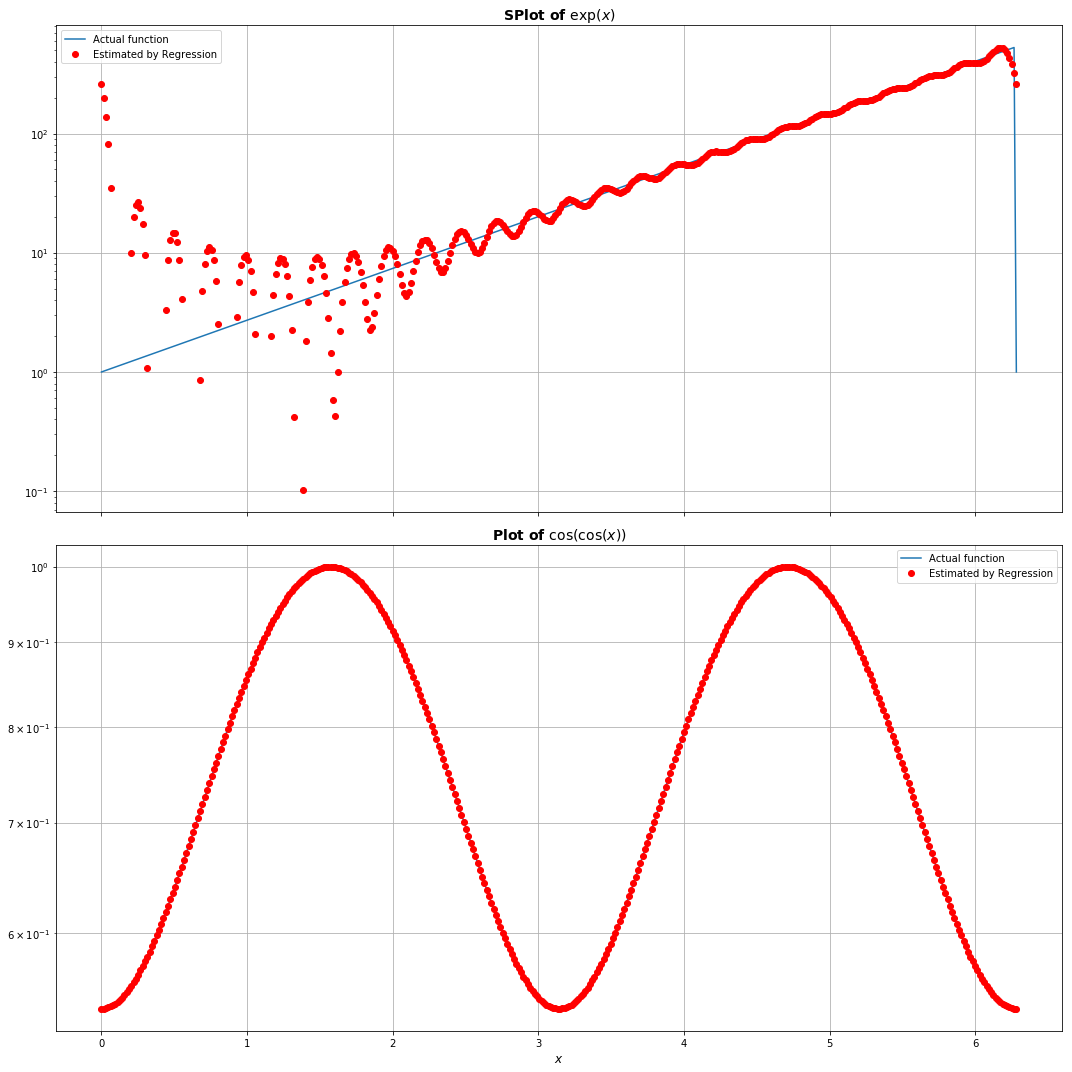

In [30]:
figure, axarr = plt.subplots(2, sharex=True)
plt.grid(True,which="both")

axarr[0].grid(True)
axarr[0].set_title(r'SPlot of $\exp(x)$', fontsize=14,fontweight="bold")
axarr[1].set_title(r'Plot of $\cos{(\cos({x}))}$', fontsize=14,fontweight="bold")

plt.xlabel('$x$',fontsize=12)

axarr[0].semilogy(x,make_periodic(exp)(x))
axarr[0].semilogy(x,b_eval_exp,'ro')
axarr[1].plot(x,cos_cos(x))
axarr[1].semilogy(x,b_eval_cos_cos,'ro')

# Neaten up plots
figure.tight_layout()
axarr[0].legend(('Actual function','Estimated by Regression'))
axarr[1].legend(('Actual function','Estimated by Regression'))
plt.show()

Notice that the function $\exp({x})$ has poor convergence with fourier series.This is due to the discontinuity of the piecewise function of $\exp({x})$, given that  $\exp({x})$ is neither periodic on any subset of real numbers, nor our interval of speciifcation. Hence, there are discontinuities at $0$ and $2\pi$. 

Hence, uniform convergence doesnot occur. However, since we have considered a finite interval for the piecewise function, there is $L2$ convergence, ie...

$$ \lim_{m\to\infty} ||\exp{(x)}-E_m(x)||^{2} =0 $$
where, $$E_m(x) = a_0+ \sum_{n=1}^{m} {a_n \cos{(nx)}+b_n \sin{(nx)}}$$

## Results and Discussion

We have examined the case of approximating functions using their fourier coefficients upto a thresholded number. Whilst doing so, we perform the same for two cases, one a continous function, and the other a function with finite discontinuties.

The methods adopted in finding the respective fourier coefficients have been direct evaluation of the fourier series formula, as well as a $L-2$ norm best fit. We notice close matching of the two methods in case of $\cos(\cos(x))$ while, larger discrepancy in $\exp(x)$. 

Besides this, we also highlight the fact of non-uniform convergence of the fourier series in case of finitely discontinuous functions.